## Pacotes 

In [1]:
# Pacotes 
#!pip install --upgrade LightPipes
from LightPipes import *
from matplotlib import image
from PIL import Image
from scipy.fft import fft2, ifft2 ,fftshift
from scipy import special
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import scipy
import random

def Lambda(M,N,sigma,delta):
  a = 1/(4*sigma**2) # [L]^-2
  b = 1/(2*delta**2) # [L]^-2
  c = 2*np.sqrt( a**2 + 2*a*b )
  L = ( np.pi/(a + b + c/2) )*( (a + b - c/2)/( a + b + c/2 ) )**( abs(M)/2 + N )
  return L

# Distribuição dos Autovalores

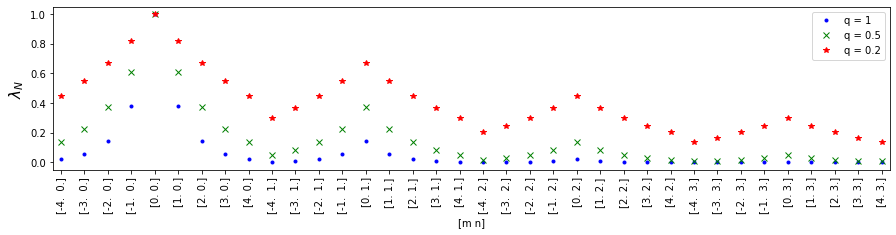

In [9]:
N = 4
M = 4
sigma = .15*mm         # largura
#--------------------------------------------------------------------------------------------------
plt.figure(figsize=(15, 3))
#--------------------------------------------------------------------------------------------------
delta = .15*mm         # comprimento de coerência
N_modos   = 0
for i in range(0,N):
  for j in range(-M,M+1):
    B = Lambda(j,i,sigma,delta)/Lambda(0,0,sigma,delta)
    if B > 0:
      N_modos +=1
A_indices = np.zeros((N_modos,2))
A_valor   = []
Modos     = 0
contador  = 0
for i in range(0,N):
  for j in range(-M,M+1):
    B = Lambda(j,i,sigma,delta)/Lambda(0,0,sigma,delta)
    if B > 0:
      A_valor.append(B)
      A_indices[contador:]  = [j,i]
      contador+=1
plt.plot(A_valor,"b.",label = "q = 1")
plt.xticks(np.arange(N_modos),A_indices,rotation=90)
plt.legend(loc=1)
#--------------------------------------------------------------------------------------------------

#--------------------------------------------------------------------------------------------------
delta     = .075*mm         # comprimento de coerência
N_modos   = 0
for i in range(0,N):
  for j in range(-M,M+1):
    B = Lambda(j,i,sigma,delta)/Lambda(0,0,sigma,delta)
    if B > 0:
      N_modos +=1
A_indices = np.zeros((N_modos,2))
A_valor   = []
Modos     = 0
contador  = 0
for i in range(0,N):
  for j in range(-M,M+1):
    B = Lambda(j,i,sigma,delta)/Lambda(0,0,sigma,delta)
    if B > 0:
      A_valor.append(B)
      A_indices[contador:]  = [j,i]
      contador+=1
plt.plot(A_valor,"gx",label = "q = 0.5")
plt.xticks(np.arange(N_modos),A_indices,rotation=90)
plt.legend(loc=1)
#--------------------------------------------------------------------------------------------------

#--------------------------------------------------------------------------------------------------
delta   = .03*mm         # comprimento de coerência
N_modos = 0
for i in range(0,N):
  for j in range(-M,M+1):
    B = Lambda(j,i,sigma,delta)/Lambda(0,0,sigma,delta)
    if B > 0:
      N_modos +=1
A_indices = np.zeros((N_modos,2))
A_valor   = []
Modos     = 0
contador  = 0
for i in range(0,N):
  for j in range(-M,M+1):
    B = Lambda(j,i,sigma,delta)/Lambda(0,0,sigma,delta)
    if B > 0:
      A_valor.append(B)
      A_indices[contador:]  = [j,i]
      contador+=1
plt.plot(A_valor,"r*",label = "q = 0.2")
plt.xticks(np.arange(N_modos),A_indices,rotation=90)
plt.legend(loc=1)
plt.margins(x=0.01)
plt.ylabel('$\lambda_N$ ',fontsize=15)
plt.xlabel('[m n]')
plt.show()

1 Número de modo: 45


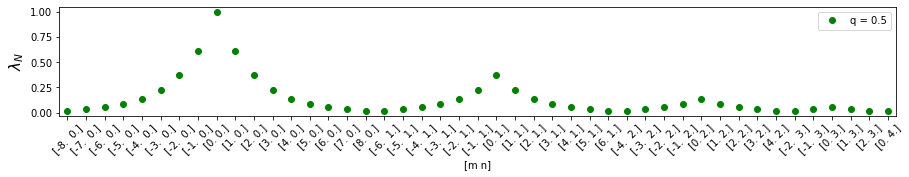

In [18]:
N = 25
M = 50

sigma = .15*mm         # largura
delta = 0.075*mm         # comprimento de coerência

##### Contabiliando qquantidade de modos ######
N_modos   = 0
for i in range(0,N+1):
  for j in range(-M,M+1):
    B = Lambda(j,i,sigma,delta)/Lambda(0,0,sigma,delta)
    if B >= 0.015:
      N_modos +=1
A_indices = np.zeros((N_modos,2))
A_valor   = []
Modos     = 0
contador  = 0
for i in range(0,N+1):
  for j in range(-M,M+1):
    B = Lambda(j,i,sigma,delta)/Lambda(0,0,sigma,delta)
    if B >= 0.015:
      A_valor.append(B)
      A_indices[contador:]  = [j,i]
      contador+=1
print("1 Número de modo:",N_modos)

q = delta/sigma
plt.subplots(figsize=(15, 2))
plt.plot(A_valor,"go",label = "q = 0.5")
plt.xticks(np.arange(N_modos),A_indices,rotation=45)
plt.margins(x=0.01)

plt.legend(loc=1)
plt.ylabel('$\lambda_N$ ',fontsize=15)
plt.xlabel('[m n]')
plt.show()

# Campo 

In [2]:
#Parâmetros do feixe GSM
lambd = 780*nm        # light wavelength
n     = 2**7          # Dimensão 
dx    = 10*um         # Tamanho do pixel
x = np.arange(-n/2, n/2,1)*dx
xx,yy = np.meshgrid(x,x) 
sigma = .15*mm         # largura
delta = .15*mm         # comprimento de coerência
truncamento = 0.015
Numero_de_Soma_Inc = 0
L = 50
P = 50
for j in range(-L,L+1):
  for jj in range(P+1):
    cutoff  = Lambda(j,jj,sigma,delta)/Lambda(0,0,sigma,delta)
    if (cutoff >= truncamento):
      Numero_de_Soma_Inc +=1
print("Quantidade de modos =",Numero_de_Soma_Inc)

#Gerando os campos para a soma incoerente
a = 1/(4*sigma**2) # [L]^-2
b = 1/(2*delta**2) # [L]^-2
c = 2*np.sqrt( a**2 + 2*a*b ) 
w = np.sqrt( 2/c )

S =  np.exp( 1j*np.zeros((n,n,Numero_de_Soma_Inc))) # Campo 
aux3 = np.zeros( (n,n,Numero_de_Soma_Inc) )           # Intensidade 

i = 0
for j in range(-L,L+1):
  for jj in range(P+1):
    cutoff  = Lambda(j,jj,sigma,delta)/Lambda(0,0,sigma,delta)
    if (cutoff >= truncamento):
      r    = np.sqrt(xx**2+yy**2)                                                 
      C    = np.sqrt(2*np.math.factorial(jj)/(np.pi*np.math.factorial(jj+abs(j))))
      PL   = scipy.special.assoc_laguerre(2*r**2/w**2,jj,abs(j))
      Fase = np.exp(- 1j*j*np.arctan2(yy,xx) )

      LG   = C*1/w*(r*np.sqrt(2)/w)**abs(j)*PL*np.exp(-r**2/w**2)*Fase

      S[:,:,i] = np.sqrt(Lambda(j,jj,sigma,delta))*LG
      aux3[:,:,i] = abs( ( np.sqrt(Lambda(j,jj,sigma,delta))*LG)*( np.sqrt(Lambda(j,jj,sigma,delta))*np.conj(LG) ) )
      i += 1

Quantidade de modos = 15


1 Número de modo: 15
q = 1.0


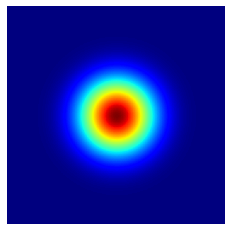

In [4]:
##### Contabilizando a quantidade de modos ######
N_modos   = 0
for i in range(0,P):
  for j in range(-L,L+1):
    B = Lambda(j,i,sigma,delta)/Lambda(0,0,sigma,delta)
    if B > truncamento:
      N_modos +=1
A_indices = np.zeros((N_modos,2))
A_valor   = []
Modos     = 0
contador  = 0
for i in range(0,P):
  for j in range(-L,L+1):
    B = Lambda(j,i,sigma,delta)/Lambda(0,0,sigma,delta)
    if B > truncamento:
      A_valor.append(B)
      A_indices[contador:]  = [j,i]
      contador+=1
print("1 Número de modo:",N_modos)

#plt.subplots(figsize=(10, 4))
#plt.plot(A_valor,"bo",label = "q = 1")
#plt.xticks(np.arange(N_modos),A_indices,rotation=90)
#plt.margins(x=0.05)
#plt.legend(loc=1)
#plt.show()

####################################################
B = np.exp(-xx[64]**2/(2*sigma**2) )
A = np.sum( aux3 ,2)
A = A/A.max()

#fig, ax = plt.subplots(figsize=(8,3))

#plt.subplot(1,2,1)
#plt.title("a)", loc = 'left')
#plt.text(1, 12, "a)",size ="x-large" )
plt.imshow(A,cmap="jet")
plt.axis("off")
#plt.colorbar()

#plt.subplot(1,2,2)
#plt.text(2, 0.92, "b)",size ="x-large" )
##plt.plot(A[:,64],"b.", label='Simul.')
##plt.plot(B,"r",label='Teorico' )
#plt.xlabel('Eixo x da Intensidade')
#plt.ylabel("Intensidade")
#plt.legend(loc=1)
plt.savefig("C:/Users/gubio/Desktop/Optica/Imagem/Imagens para apresentação/GSM/Sequência de imagem com q =1/TOTAL123.png")

print(f"q = {delta/sigma}")
#plt.show()

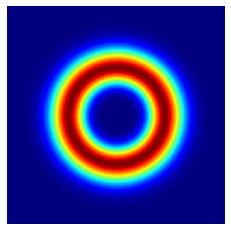

In [51]:
for i in range(len(aux3[0,0])):
    plt.imshow(aux3[:,:,i],cmap="jet")
    plt.axis("off")
    plt.savefig(f"C:/Users/gubio/Desktop/Optica/Imagem/Imagens para apresentação/GSM/Sequência de imagem com q =1/Campo {i}.png")


#  Change q and cutoff

In [37]:
###############################  Parâmetros do feixe GSM
lambd = 780*nm                #  Light wavelength.
n     = 2**7                  #  Dimension.
dx    = 10*um                 #  Size of pixel.

x = np.arange(-n/2, n/2,1)*dx #  Vetor x.
xx,yy = np.meshgrid(x,x)      #  Vector x and y, in other words , this is the matrix d^2 of the vecto.

L = 50                        # Limit of azimuthal order.
P = 50                        # Limit of radial order.
N_of_q = [0.015,0.075,0.03]       # Númber of different values of q.
N_of_cutoff = [0.5,0.2,0.07,0.015] # Number of different values of cutoff.
W_q = np.zeros((n,n,3*4))# Box of CDS for different parametric values.
BB  = []                      # Box of Theory GSM .
Contador = 0
for i_cutoff in N_of_cutoff:
  for i_q in N_of_q:
    ###############################  Parâmetros do feixe GSM.
    sigma = 0.15*mm                 #  Widht/lenght of beam or waist beam.
    delta = i_q*mm #  Widht of coherenc Divido por um número constante [0.5,0.]. 

    truncamento = i_cutoff             # Value of CutOff.
    Numero_de_Soma_Inc = 0        # Incoherent sum number counter.

    a = 1/(4*sigma**2) 
    b = 1/(2*delta**2) 
    c = 2*np.sqrt( a**2 + 2*a*b ) 
    w = np.sqrt( 2/c )

    ################################################################################
    # 1° Vamos definir o número de modos. Com entradas de Sig, Delt e cutoff.
    for j in range(-L,L+1):
      for jj in range(P+1):
        cutoff  = Lambda(j,jj,sigma,delta)/Lambda(0,0,sigma,delta)
        if (cutoff >= truncamento):
          Numero_de_Soma_Inc +=1
    # 2° Gerando os campos para a soma incoerente
    S =  np.exp( 1j*np.zeros((n,n,Numero_de_Soma_Inc)))   # Box of Filds.
    aux3 = np.zeros( (n,n,Numero_de_Soma_Inc) )           # Box of Intensity Filds. 
    i = 0
    for j in range(-L,L+1):
      for jj in range(P+1):
        cutoff  = Lambda(j,jj,sigma,delta)/Lambda(0,0,sigma,delta)
        if (cutoff >= truncamento):
          r    = np.sqrt(xx**2+yy**2)                                                 
          C    = np.sqrt(2*np.math.factorial(jj)/(np.pi*np.math.factorial(jj+abs(j))))
          PL   = scipy.special.assoc_laguerre(2*r**2/w**2,jj,abs(j))
          Fase = np.exp(- 1j*j*np.arctan2(yy,xx) )

          LG   = C*1/w*(r*np.sqrt(2)/w)**abs(j)*PL*np.exp(-r**2/w**2)*Fase

          S[:,:,i] = np.sqrt(Lambda(j,jj,sigma,delta))*LG
          aux3[:,:,i] = abs( np.sqrt(Lambda(j,jj,sigma,delta))*LG )**2
          i += 1

    B = np.exp(-xx[64]**2/(2*sigma**2) )
    BB.append(B)
    A = np.sum( aux3 ,2)
    W_q[:,:,Contador] =  A/A.max()
    Contador+=1

## grafico

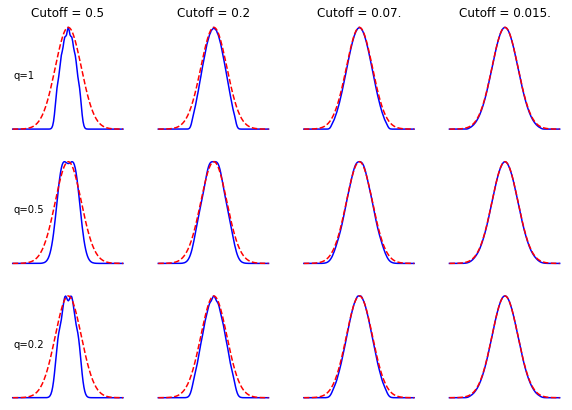

In [46]:
fig, ax = plt.subplots(3,4,figsize=(10,7))
###############################################
ax[0,0].set_title("Cutoff = 0.5")

ax[0,0].plot(W_q[:,64,0],'b')
ax[0,0].plot(BB[0],"r--")
ax[0,0].text(1,0.5,"q=1")
ax[0,0].axis("off")


ax[1,0].plot(W_q[:,64,1],'b')
ax[1,0].plot(BB[1],"r--")
ax[1,0].text(1,0.5,"q=0.5")
ax[1,0].axis("off")


ax[2,0].plot(W_q[:,64,2],'b')
ax[2,0].plot(BB[2],"r--")
ax[2,0].text(1,0.5,"q=0.2")
ax[2,0].axis("off")


#ax[3,0].plot(W_q[:,256,3])
#ax[3,0].plot(BB[3],"r--")
#ax[3,0].text(1,0.5,"q=0.4")
#ax[3,0].axis("off")


#ax[4,0].plot(W_q[:,256,4])
#ax[4,0].plot(BB[4],"r--")
#ax[4,0].text(1,0.5,"q=0.2")
#ax[4,0].axis("off")

#############################################
ax[0,1].set_title("Cutoff = 0.2")

ax[0,1].plot(W_q[:,64,3],'b')
ax[0,1].plot(BB[3],"r--")
ax[0,1].axis("off")

ax[1,1].plot(W_q[:,64,4],'b')
ax[1,1].plot(BB[4],"r--")
ax[1,1].axis("off")

ax[2,1].plot(W_q[:,64,5],'b')
ax[2,1].plot(BB[5],"r--")
ax[2,1].axis("off")

#ax[3,1].plot(W_q[:,256,8])
#ax[3,1].plot(BB[8],"r--")
#ax[3,1].axis("off")

#ax[4,1].plot(W_q[:,256,9])
#ax[4,1].plot(BB[9],"r--")
#ax[4,1].axis("off")

#############################################

ax[0,2].set_title("Cutoff = 0.07.")

ax[0,2].plot(W_q[:,64,6],'b')
ax[0,2].plot(BB[6],"r--")
ax[0,2].axis("off")

ax[1,2].plot(W_q[:,64,7],'b')
ax[1,2].plot(BB[7],"r--")
ax[1,2].axis("off")

ax[2,2].plot(W_q[:,64,8],'b')
ax[2,2].plot(BB[8],"r--")
ax[2,2].axis("off")

#ax[3,2].plot(W_q[:,256,13])
#ax[3,2].plot(BB[13],"r--")
#ax[3,2].axis("off")

#ax[4,2].plot(W_q[:,256,14])
#ax[4,2].plot(BB[14],"r--")
#ax[4,2].axis("off")

#############################################
#############################################

ax[0,3].set_title("Cutoff = 0.015.")

ax[0,3].plot(W_q[:,64,9],'b')
ax[0,3].plot(BB[9],"r--")
ax[0,3].axis("off")

ax[1,3].plot(W_q[:,64,10],'b')
ax[1,3].plot(BB[10],"r--")
ax[1,3].axis("off")

ax[2,3].plot(W_q[:,64,11],'b')
ax[2,3].plot(BB[11],"r--")
ax[2,3].axis("off")

#ax[3,3].plot(W_q[:,256,18])
#ax[3,3].plot(BB[18],"r--")
#ax[3,3].axis("off")

#ax[4,3].plot(W_q[:,256,19])
#ax[4,3].plot(BB[19],"r--")
#ax[4,3].axis("off")

#############################################
plt.show()

# Doc(r,0)

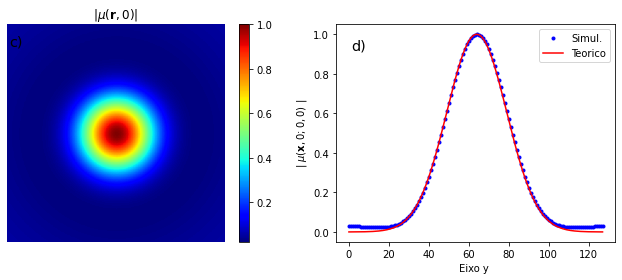

In [6]:
ref = [0,0]                        
index = np.where((xx==ref[0])*(yy==ref[1])==True)        

mu = np.zeros_like(S[:,:,1])
intMap = np.sum(abs(S)**2,2) 

for ii in range(0,n):
    for jj in range(0,n):
      mu[ii,jj] = np.sum( np.conj(S[ii,jj,:])*S[index[0],index[1],:]    )/np.sqrt(intMap[ii,jj]*intMap[index[0],index[1]])

img = abs(mu) 
img = img/img.max()

BB = np.exp(-x**2/(2*delta**2) )

fig, ax = plt.subplots(figsize=(11,4))

plt.subplot(1,2,1)
plt.text(1, 12, "c)",size ="x-large" )
plt.imshow(img,cmap = "jet")
plt.title('|$\mu(\mathbf{r},0)$|')
plt.colorbar()
plt.axis("off")

plt.subplot(1,2,2)
plt.text(1, 0.92, "d)",size ="x-large" )
plt.plot(img[:,64],"b.", label='Simul.')
plt.plot(BB,"r",label='Teorico')
#plt.axis("off")
plt.xlabel('Eixo y ')
plt.ylabel("| $\mu(\mathbf{x},0;0,0)$ |")
plt.legend(loc=1)
plt.show()


# Interferencia 

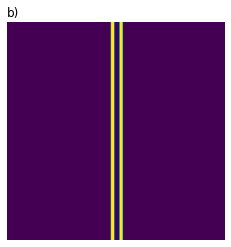

In [241]:
# Inicialização

class grid:
  pass
grid.N  = n;   
grid.dx = dx                               
grid.x  = np.arange(-grid.N/2,grid.N/2,1)*grid.dx;
[grid.xx,grid.yy] = np.meshgrid(grid.x,grid.x);  

d0 = .05*mm; 
a0 = d0/3; 
# make slit
fslit = (np.ones_like(grid.xx)*(abs(grid.xx+(d0/2))<=a0/2) +
         np.ones_like(grid.xx)*(abs(grid.xx-(d0/2))<=a0/2));
F  = Begin(abs(x[0])*2,lambd,n-1) 
plt.title("b)", loc = 'left') 
plt.axis("off")
plt.imshow(fslit);plt.show()

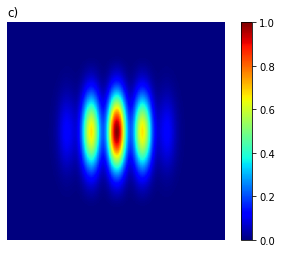

In [242]:
# passando pelas fendas --> soma incoerente
imagem =[0]
aux4 = np.exp(1j*np.zeros((n,n,N_modos)))
FF = F.copy(F)

for ii in range(N_modos):
  FF.field = S[:,:,ii]*fslit
  FF1      = Forvard(1*cm,FF)
  aux4[:,:,ii] = Intensity(FF1)
  imagem     += Intensity(FF1)
imagem = imagem/imagem.max()
plt.imshow(imagem,cmap = "jet");
plt.colorbar();
plt.title("c)", loc = 'left')
plt.axis("off")
plt.show()

In [243]:
# Ajustado para analisar na Direita e esquerda
### Função da Suavização #########################
def SUAVE(media, linha):
  novalista = []
  for i in range(media ,2**7,1):
    b = imagem[linha,i-media:i]
    AA = sum(b)/media
    novalista.append(AA)
  return np.array(novalista)

def MM(suavizar,linha):
  maxi2 = SUAVE(suavizar,linha).max()
  posiçao2 = 0
  for i in SUAVE(suavizar,linha):
    if i == maxi2:
      break 
    posiçao2 +=1 

#### Encontrar o valor mínimo local a Direita parti do maximo global
  mini = 0
  Vimax = SUAVE(suavizar,linha)[posiçao2:2**7]
  for i in range(len(Vimax)):
    if i == len(Vimax)-1:
      break
    if Vimax[i] > Vimax[i+1]:
      mini = Vimax[i+1]
    elif Vimax[i] < Vimax[i+1]:
      mini = Vimax[i]
      break   
  # Vamos encontrar o posição no qual temos mínimo
  PMin = 0 
  for i in Vimax:
    if i == mini:
      break 
    PMin += 1  
  posiçaomin = posiçao2 + PMin -1
#######################################################################
#### Encontrar o valor mínimo local a ESQUERDA a parti do maximo lobal
  miniE = 0
  xamiV = SUAVE(suavizar,linha)[0:posiçao2]
#########################################################
  for i in range(len(xamiV)):
    i += 1
    if i == len(xamiV)-1:
      break
    if xamiV[-i] > xamiV[-i-1]:
      miniE = xamiV[-i-1]
    elif xamiV[-i] < xamiV[-i-1]:
      miniE = xamiV[-i]
      break   
  # Vamos encontrar o posição no qual temos mínimo
  PMinE = 0 
  for i in range(len(xamiV)):
    i+=1
    if xamiV[-i] == miniE: 
      break 
    PMinE += 1  
  posiçaominE = posiçao2 - PMinE

  if miniE > mini:
    posiçaomin = posiçaominE
    mini       = miniE
  # [0] = Valor max,[1] = Posição max ,[2] = Valor Min,[3] = Posição Min
  return maxi2, posiçao2, mini, posiçaomin  #,miniE, posiçaominE  

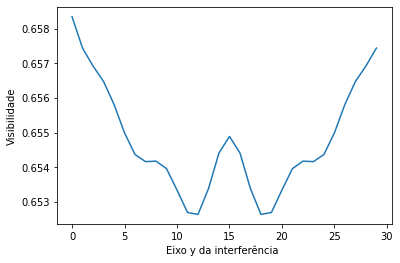

Valor medio Visibilidade  0.654762726580205


In [246]:
# A VISIBILIDADE TODA
VisibilidadeN = []
q = 1
qq = 0
for j in range(grid.N//2 - 15,grid.N//2 + 15):
  V = ( MM(q,j)[0]-MM(q,j)[2])/(MM(q,j)[0]+MM(q,j)[2])
  VisibilidadeN.append(V) 
  qq+=1
  
plt.plot(VisibilidadeN) 
plt.xlabel('Eixo y da interferência ')
plt.ylabel("Visibilidade")
#plt.title("b)", loc = 'left')
plt.show()
print("Valor medio Visibilidade ",sum(VisibilidadeN)/qq)

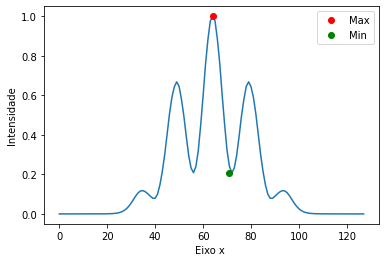

Visibilidade = 0.654892094925861


In [245]:
qe = 1
qw = 64
# DISTRIBUIÇÃO DE INTENSIDADE
plt.plot(imagem[qw])
plt.plot(MM(qe,qw)[1] , MM(qe,qw)[0] , 'o', color ='red' ,label='Max'  )
plt.plot(MM(qe,qw)[3] , MM(qe,qw)[2] , 'o', color ='green', label='Min'  )
plt.xlabel('Eixo x ')
plt.ylabel("Intensidade")
plt.legend(loc=1)
plt.show()
# VISIBILIDADE
V = ( MM(qe,qw)[0]  - MM(qe,qw)[2] )/( MM(qe,qw)[0]  + MM(qe,qw)[2])
print("Visibilidade =",V)

In [209]:
print(MM(2,qw)[0] )
print(MM(2,qw)[2] )

0.0017984185301046685
4.382164296705728e-05
